In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/MAP_Hack/train.csv')

In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/MAP_Hack/test.csv')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
X = df_train[['avocado','avocado_spt','apple_ige','peanut_ige','banana','soy_ige','mango','arah_2','green_pea_ige']]
y = df_train['target']
X_imputed = X.fillna(X.median())

X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.5, random_state=42)
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred = clf.predict(X_val)

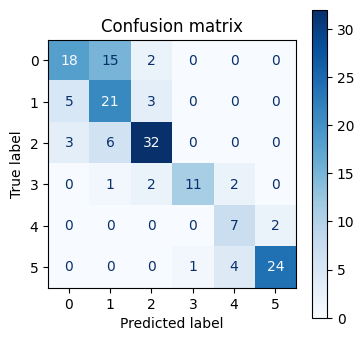

In [18]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_pred,
    cmap=plt.cm.Blues,
#        normalize=normalize,
    )
_ = display.ax_.set_title("Confusion matrix")


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.51      0.59        35
           1       0.49      0.72      0.58        29
           2       0.82      0.78      0.80        41
           3       0.92      0.69      0.79        16
           4       0.54      0.78      0.64         9
           5       0.92      0.83      0.87        29

    accuracy                           0.71       159
   macro avg       0.73      0.72      0.71       159
weighted avg       0.74      0.71      0.72       159



In [24]:
X_test = df_test[['avocado','avocado_spt','apple_ige','peanut_ige','banana','soy_ige','mango','arah_2','green_pea_ige']]
X_test_imputed = X_test.fillna(X.median())
X_test_imputed.head()

,avocado,avocado_spt,apple_ige,peanut_ige,banana,soy_ige,mango,arah_2,green_pea_ige
0,0.59,0.0,6.89,26.80,1.295,5.440,0.89,22.5,3.19
1,0.59,0.0,6.89,52.80,1.295,2.205,0.89,20.8,3.19
2,0.59,0.0,6.89,0.48,1.295,2.205,0.89,0.0,3.19
3,0.59,0.0,6.89,2.60,0.670,2.205,1.43,0.0,3.19
4,0.59,0.0,6.89,101.00,1.295,2.205,0.89,101.0,3.19


In [25]:
y_pred_test = clf.predict(X_test_imputed)

In [27]:
pd.DataFrame({'ID': df_test.ID, 'target': y_pred_test}).head()

,ID,target
0,3797,2
1,2338,2
2,3907,0
3,4821,0
4,2515,5


In [28]:
pd.DataFrame({'ID': df_test.ID, 'target': y_pred_test}).to_csv('/content/drive/MyDrive/MAP_Hack/submission8_Yuka.csv', index = False)